# 3.5_lab-imbalanced-data
Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
4. Build the logistic regression model.
5. Evaluate the model.
6. Even a simple model will give us more than 70% accuracy. Why?
7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
# import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline



In [2]:
URL = '/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/3.5_lab-imbalanced-data/files_for_lab/customer_churn.csv'
data = pd.read_csv(URL)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
display(data.shape)
display(data.index)
display(data.columns)
display(data.info())
display(data.describe())

(7043, 21)

RangeIndex(start=0, stop=7043, step=1)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
cat_variables =  data.select_dtypes('object')
cat_variables

for c in cat_variables.columns[1:]:
    display(cat_variables[c].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# TotalCharges should be float, it show there is a empty string value ' ' count as 11

In [5]:
# check rows with TotalCharges as ' ' string
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
# checking value of column tenure
display(data.tenure.unique())
display(data.tenure.value_counts())

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [ ]:
# SeniorCitizen is label. 
# Here show datatype as int, it is fine as long as we are aware and not treat it as numerical variable 
# convenient for modeling --> no need to encode

In [7]:
# X/y split

X = data[['SeniorCitizen', 'tenure', 'MonthlyCharges']]
y = data['Churn']

In [8]:
X.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [ ]:
Build the logistic regression model.
5. Evaluate the model.
6. Even a simple model will give us more than 70% accuracy. Why?
7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

# Modelling

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 37)

In [11]:
from sklearn.linear_model import LogisticRegression
# binary logistic regression model:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr')

classification.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [12]:
y_train_pred = classification.predict(X_train)
y_test_pred =classification.predict(X_test)

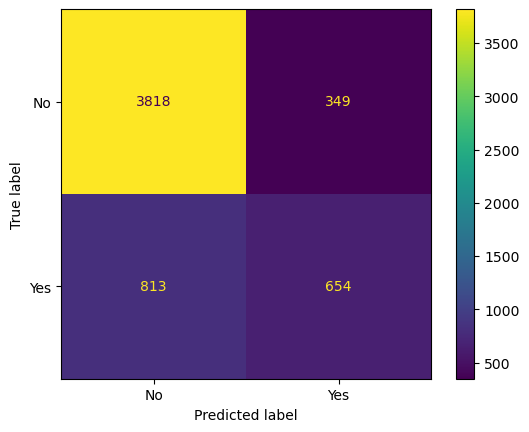

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_train = confusion_matrix(y_train, y_train_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=classification.classes_)
disp.plot()
plt.show()

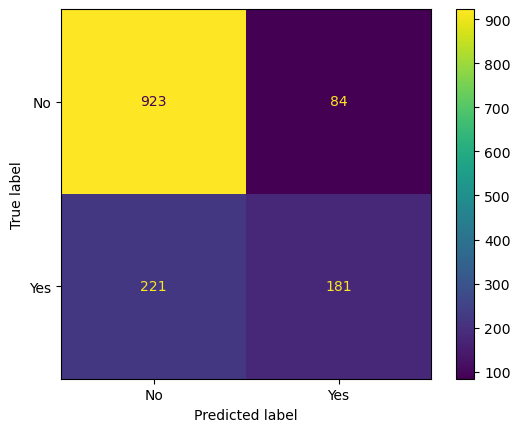

In [14]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classification.classes_)
disp.plot()
plt.show()

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
print('Evaluation metrics for train set:')
print(classification_report(y_train, y_train_pred) )
print()
print('kappa_score:',cohen_kappa_score(y_train, y_train_pred))
print('--------------------')
print('Evaluation metrics for test set:')
print(classification_report(y_test, y_test_pred) )
print('kappa_score:', cohen_kappa_score(y_test, y_test_pred))


Evaluation metrics for train set:
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      4167
         Yes       0.65      0.45      0.53      1467

    accuracy                           0.79      5634
   macro avg       0.74      0.68      0.70      5634
weighted avg       0.78      0.79      0.78      5634


kappa_score: 0.4033899750828793
--------------------
Evaluation metrics for test set:
              precision    recall  f1-score   support

          No       0.81      0.92      0.86      1007
         Yes       0.68      0.45      0.54       402

    accuracy                           0.78      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409

kappa_score: 0.40866991494930116


# 6. Even a simple model will give us more than 70% accuracy. Why?

the predicted label 'Churn' show value counts:

Churn
No     5174
Yes    1869

--> this is extremely imbalance

The model is bias 
--> shown with the confusion matrices, in both train and test set, it predict more label "no".

Therefore, lower precision, recall,and f1 scores for 'yes' when compared with recall, precision, f1 scores for "no" which are high as the data has more "no" label 

also, this model is too simple, there is not enough info and good correlation to predict y, as seen in confusion matrix and metrics, with high amount of false negative and false positive on the train set itself.


# 7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [34]:
!conda install -c conda-forge imbalanced-learn -y

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /Users/minhnguyen/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.11.17 |       h8857fd0_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    imbalanced-learn-0.11.0    |     pyhd8ed1ab_0         138 KB  conda-forge
    openssl-3.2.0              |       hd75f5a5_1         2.4 MB  conda-forge
    ---------------------------------------------------------

In [34]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [35]:
X_train_SMOTE
y_train_SMOTE.value_counts()

Churn
No     4167
Yes    4167
Name: count, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression
# binary logistic regression model:
classification_SMOTE = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr')

classification_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(multi_class='ovr', random_state=0)

In [37]:
y_train_pred_SMOTE = classification_SMOTE.predict(X_train_SMOTE)
y_test_pred_SMOTE =classification_SMOTE.predict(X_test)

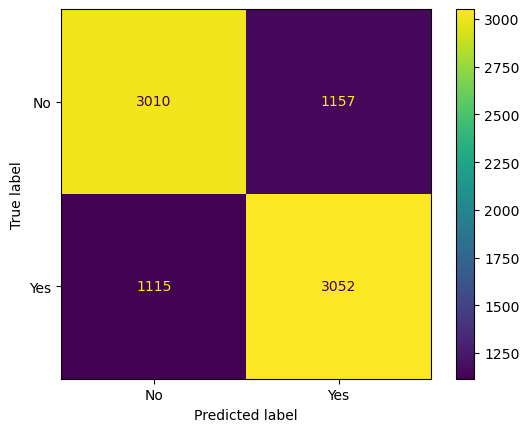

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_train_SMOTE = confusion_matrix(y_train_SMOTE, y_train_pred_SMOTE)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_train_SMOTE, display_labels=classification_SMOTE.classes_)
disp.plot()
plt.show()

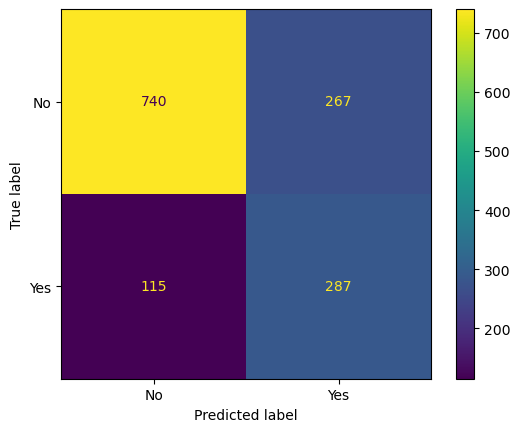

In [39]:
cm_test_SMOTE = confusion_matrix(y_test, y_test_pred_SMOTE)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_test_SMOTE, display_labels=classification_SMOTE.classes_)
disp.plot()
plt.show()

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
print('Evaluation metrics for train set:')
print(classification_report(y_train_SMOTE, y_train_pred_SMOTE) )
print()
print('kappa_score:',cohen_kappa_score(y_train_SMOTE, y_train_pred_SMOTE))
print('--------------------')
print('Evaluation metrics for test set:')
print(classification_report(y_test, y_test_pred_SMOTE) )
print('kappa_score:', cohen_kappa_score(y_test, y_test_pred_SMOTE))


Evaluation metrics for train set:
              precision    recall  f1-score   support

          No       0.73      0.72      0.73      4167
         Yes       0.73      0.73      0.73      4167

    accuracy                           0.73      8334
   macro avg       0.73      0.73      0.73      8334
weighted avg       0.73      0.73      0.73      8334


kappa_score: 0.4547636189104871
--------------------
Evaluation metrics for test set:
              precision    recall  f1-score   support

          No       0.87      0.73      0.79      1007
         Yes       0.52      0.71      0.60       402

    accuracy                           0.73      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.73      0.74      1409

kappa_score: 0.40301113147025025


# insights:
1. There is a tiny improvement of model performance on the train set: kappa (0.459 vs 0.403), overall improvement of precision, recall, f1 for both labels (Y, N), accuracy slightly decreases
2. however, on the test set, barely improvement on anything, except for an increase of the Yes label's recall, but decrease of it precision. kappa_score is the same
3. so overall, I would say not much of improvement.
4. I tested k_neighbours = 3 vs 5 in the SMOTE model, but not much different